In [7]:
import pymysql
import pandas as pd
import lxml
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
# sns.set()

In [8]:
# conn = pymysql.connect(
#     host='localhost',
#     user='root',
#     password=pw,
#     db='stock',
#     charset='utf8'
#     )

# # create cursor
# ## create company_info and daily_price table if not exists
# with conn.cursor() as curs:
#     sql = """
#     CREATE TABLE IF NOT EXISTS company_info (
#         code VARCHAR(20),
#         company VARCHAR(100),
#         last_update DATE,
#         PRIMARY KEY (code)
#     )
#     """

#     curs.execute(sql)

#     sql = """
#     CREATE TABLE IF NOT EXISTS daily_price(
#         code VARCHAR(20),
#         date DATE,
#         open BIGINT,
#         high BIGINT,
#         low BIGINT,
#         close BIGINT,
#         diff BIGINT,
#         volume BIGINT,
#         PRIMARY KEY (code, date)
#     )
#     """
#     curs.execute(sql)
#     curs.close()
        
#     # commit
# conn.commit()

In [9]:
# url="https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13"
# krx = pd.read_html(url, header=0)[0]
# krx = krx[['종목코드', '회사명']]
# krx = krx.rename(columns={'종목코드':'code', '회사명':'company'})
# krx.code = krx.code.map('{:06d}'.format)
# krx.head()                               

In [10]:
# from datetime import datetime
# codes = dict()
# sql = "SELECT * FROM company_info"
# df = pd.read_sql(sql, conn)
# for idx in range(len(df)):
#     ## update codes dictionary using code and company_name
#     codes[df['code'].values[idx]] = df['company'].values[idx]
# with conn.cursor() as curs:
#     sql = """
#     SELECT max(last_update) FROM company_info
#     """
#     curs.execute(sql)
#     ## get recent update date
#     rs = curs.fetchone()
#     today = datetime.today().strftime('%Y-%m-%d')

#     if rs[0] == None or rs[0].strftime('%Y-%m-%d') < today:
#         for idx in range(len(krx)):
#             code = krx.code.values[idx]
#             company = krx.company.values[idx]
#             sql = f"REPLACE INTO company_info (code, company, last_update) VALUES ('{code}', '{company}', '{today}')"
#             curs.execute(sql)
#             codes[code] = company
#             tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
#             print(f"[{tmnow}] #{idx+1:04d} REPLACE INTO company_info VALUES ({code}, {company}, {today})")
#         conn.commit()
#         print('')
#     curs.close()



In [11]:
# from bs4 import BeautifulSoup
# import urllib
# import requests

# # setting UA header
# header = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}

# # request url
# url = 'http://finance.naver.com/item/sise_day.nhn?code=005930'
# request = urllib.request.Request(url, headers=header)

# # get html
# doc =urllib.request.urlopen(request)
# html = BeautifulSoup(doc, "lxml")

# # parsing
# ## find the last page
# pgrr = html.find('td', class_='pgRR')
# s = str(pgrr.a['href']).split('=')
# lastpage = s[-1]

# # make dataframe
# df = pd.DataFrame()

# # crawling
# ## crawling min(lastpage, 10) pages
# pages = min(int(lastpage), 10)
# for page in range(1, pages+1):
#     page_url = '{}&page={}'.format(url, page)
#     # append daily prices into dataframe
#     df = df.append(pd.read_html(requests.get(page_url, headers=header).text)[0])
#     tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
#     print('[{}] {} ({}) : {:04d}/{:04d} pages are downloading...'.format(tmnow, codes['005930'], '005930', page, pages), end="\r")

# df = df.rename(columns={'날짜':'date', '종가':'close', '전일비':'diff', '시가':'open', '고가':'high', '저가':'low', '거래량':'volume'})
# df = df.dropna()
# df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int)
# df = df[['date', 'open', 'high', 'low', 'close', 'diff', 'volume']]

# df.head()



In [12]:
# import KospiAnalyzer as ka

# naver = ka.KospiTicker().analyze_stock('NAVER','2021-01-01', graph=True)

In [13]:
# ka.KospiTicker().get_daily_price('NAVER','2021-01-01')

In [14]:
# import KospiAnalyzer as ka
# import matplotlib.pyplot as plt
# import numpy as np

# # analyze_stock
# def analyze_stock(company, start_date=None, end_date=None, graph=False, rolling_window=20):
#     # # feature name creation using company name
#     # exec("df_%s = %s" % (company, ka.KospiTicker().get_daily_price('company', start_date, end_date)))
#     df = ka.KospiTicker().get_daily_price(company, start_date, end_date)


#     # daily returns
#     df['rets_daily'] = df['close'].pct_change().fillna(0)
#     # rolling returns (rolling_window = 20 days)
#     df['rets_rolling'] = df['close'].pct_change(rolling_window).fillna(0)

#     # volatility
#     ## rolling volatility (1 year)
#     df['vol_yearly'] = df['rets_daily'].rolling(252).std().fillna(0) * np.sqrt(252)
#     ## rolling volatility (rolling_window = 20 days)
#     df['vol_rolling'] = df['rets_daily'].rolling(rolling_window).std().fillna(0) * np.sqrt(20)

#     # Bollinger band
#     ## rolling_window = 20 days
#     df['MA_rolling'] = df['close'].rolling(window=rolling_window).mean()
#     df['MV_rolling'] = df['close'].rolling(window=rolling_window).std()
#     df['bolllinger_upper'] = df['MA_rolling'] + (df['MV_rolling'] * 2)
#     df['bollinger_lower'] = df['MA_rolling'] - (df['MV_rolling'] * 2)

#     ## Bollinger band index: %b 
#     df['bollinger_percentage'] = (df['close'] - df['bollinger_lower']) / (df['bolllinger_upper'] - df['bollinger_lower'])

#     ## Bollinger band bandwidth
#     df['bollinger_bandwidth'] = (df['bolllinger_upper'] - df['bollinger_lower']) / df['MA_rolling'] * 100
    

#     # plot graph

#     if graph == True:
#         plt.figure(figsize=(10, 40))
#         # close price graph
#         plt.subplot(6, 1, 1)
#         plt.plot(df.loc[pd.to_datetime(df.index) > pd.to_datetime(start_date)]['close'])
#         plt.title(f'Daily Close Price: {company}')
#         # returns graph
#         plt.subplot(6, 1, 2)
#         plt.plot(df.loc[pd.to_datetime(df.index) > pd.to_datetime(start_date)]['rets_daily'])
#         plt.title(f'Daily Returns: {company}')
#         # rolling volatility graph
#         plt.subplot(6, 1, 3)
#         plt.plot(df.loc[pd.to_datetime(df.index) > pd.to_datetime(start_date)]['vol_rolling'])
#         plt.title(f'Rolling Volatility: {company}')

#         # Bollinger band graph
#         plt.subplot(6, 1, 4)
#         plt.plot(df.index, df['close'], color='#0000ff', label='Close')
#         plt.plot(df.index, df['MA_rolling'], 'k--', label='Moving average 20')
#         plt.plot(df.index, df['bolllinger_upper'], 'r--', label='Upper band')
#         plt.plot(df.index, df['bollinger_lower'], 'c--', label='Lower band')
#         plt.fill_between(df.index, df['bolllinger_upper'], df['bollinger_lower'], color='0.9')
#         plt.legend(loc='best')
#         plt.title(f'{company} Bollinger Band (20 day, 2 std)')

#         # Bollinger band index graph
#         plt.subplot(6, 1, 5)
#         plt.plot(df.index, df['bollinger_percentage'], 'b', label='%b')
#         plt.grid(True)
#         plt.legend(loc='best')
#         plt.title(f'{company} %B')

#         # Bollinger band bandwidth graph
#         plt.subplot(6, 1, 6)
#         plt.plot(df.index, df['bollinger_bandwidth'], 'm', label='Bandwidth')
#         plt.grid(True)
#         plt.legend(loc='best')
#         plt.title(f'{company} Bandwidth')


#     # analyze yesterday's data
#     yesterday_data = {'date': df.index[-1], 
#             'close': df['close'][-1], 
#             'ret_yesterday': df['rets_daily'][-1], 
#             'ret_rolling': df['rets_rolling'][-1],
#             'vol_yesterday_yearly': df['vol_yearly'][-1], 
#             'vol_yesterday_rolling': df['vol_rolling'][-1],
#             'bollinger_percentage_yesterday': df['bollinger_percentage'][-1], 
#             'bollinger_percentage_rolling_mean': df['bollinger_percentage'][-rolling_window:].mean(),
#             'bollinger_bandwidth_yesterday': df['bollinger_bandwidth'][-1], 
#             'bollinger_bandwidth_rolling_mean': df['bollinger_bandwidth'][-rolling_window:].mean()}
#     df_analyzed = pd.DataFrame(yesterday_data, index=[0])
#     df_analyzed.set_index('date', inplace=True)
    
#     print(df_analyzed)
#     return df_analyzed

    


In [15]:
# import pandas as pd
# tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', '카카오페이', 'LG화학']
# data = pd.DataFrame()
# for ticker in tickers:
#     df = ka.KospiTicker().get_daily_price(ticker, '2021-01-01')
#     data[ticker] = df['close']
# data

In [16]:
# # returns
# rets = data.pct_change().fillna(0)
# # expected returns (yearly)
# er = rets.mean() * 252
# # covariance matrix (yearly)
# cov = rets.cov() * 252

# cov


In [17]:
# # empty list for portfolio returns
# p_retunrs = []

# # empty list for portfolio volatility
# p_volatility = []

# # number of assets
# noa = len(tickers)

# # number of simulations
# n_ports = 10000

In [18]:
# import numpy as np
# # execute simulation
# for i in range(n_ports):

#     # random weights
#     weights = np.random.random(noa)
#     weights /= np.sum(weights)

#     # portfolio returns and volatility
#     ret = np.dot(weights, er)
#     vol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

#     # append returns and volatilities of each simulation
#     p_retunrs.append(ret)
#     p_volatility.append(vol)

In [19]:
# # convert to numpy array
# prets = np.array(p_retunrs)
# pvols = np.array(p_volatility)

In [20]:
# import matplotlib.pyplot as plt
# # plot simulation result
# plt.scatter(x=pvols, y=prets, c=prets / pvols, marker='o')
# plt.xlabel('Expected volatility')
# plt.ylabel('Expected return')
# plt.title('Portfolio Simulation')
# plt.show()

In [21]:
# # Get efficient frontier
# import scipy.optimize as sco

# # fucntion calculating portfolio statistics
# def statistics(weights):

#     # weights on portfolio
#     weights = np.array(weights)

#     # portfolio returns
#     pret = np.sum(er * weights)

#     # portfolio volatility
#     pvol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

#     # return ret, vol and sharpe ratio
#     return np.array([pret, pvol, pret / pvol])

In [22]:
# # random weights from random function
# weights = np.random.random(noa)
# weights /= np.sum(weights)

In [23]:
# # objective function : portfolio volatility
# def obj_func(weights):
#     return statistics(weights)[1]

In [24]:
# # linspace for portfolio returns
# trets = np.linspace(prets.min(), prets.max(), 100)
# tvols = []

# # volatility level for each return
# for tret in trets:
#     # weights : initial equal weights
#     init_guess = np.repeat(1 / noa, noa)

#     # constraints : return level
#     # 'type': 'eq' -> equation
#     # 'fun' : lambda x : statistics[x] - tret
#     cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
#             {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
#     # frotier condition
#     bnds = tuple((0.0, 1.0) for x in weights)

#     # minimize volatility
#     res = sco.minimize(obj_func, 
#                        init_guess,
#                        method='SLSQP',
#                        bounds=bnds,
#                        constraints=cons)
    
#     tvols.append(res['fun'])

# tvols = np.array(tvols)

In [25]:
# # left frontier data
# ind = np.argmin(tvols)
# evols = tvols[ind:]
# erets = trets[ind:]

In [26]:
# # plot efficient frontier
# plt.figure(figsize=(8, 8))
# plt.scatter(x=pvols, y=prets, c=prets / pvols, marker='o')
# plt.plot(evols, erets, 'b', lw=4.0)
# plt.grid(True)
# plt.xlabel('Expected volatility')
# plt.ylabel('Expected return')
# plt.title('Portfolio Frontier')

In [27]:
# # portfolio with maximum sharpe ratio
# def get_msr_weights(er, cov):

#     # number of assets
#     noa = er.shape[0]

#     # initial equal weights
#     init_guess = np.repeat(1 / noa, noa)

#     # weights boundary
#     bounds = ((0.0, 1.0),) * noa

#     # constraints : imposibility of leverage
#     weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

#     # objective function : negative sharpe ratio
#     def neg_sharpe_ratio(weights, er, cov):
#         r = weights.T @ er
#         vol = np.sqrt(weights.T @ cov @ weights)
#         return -r / vol 
    
#     # optimization
#     res = sco.minimize(neg_sharpe_ratio,
#                        init_guess,
#                        args=(er, cov),
#                        method='SLSQP',
#                        constraints=(weights_sum_to_1),
#                        bounds=bounds)
    
#     return res.x

In [28]:
# # MSR portfolio weights
# msr_weights = get_msr_weights(er, cov)

# # MSR portfolio returns and volatility
# msr_ret = np.dot(msr_weights, er)
# msr_vol = np.sqrt(np.dot(msr_weights.T, np.dot(cov, msr_weights)))

# print('Return = {}'.format(msr_ret))
# print('Volatility = {}'.format(msr_vol))

In [29]:
# # plot market portfolio
# msr_weights_series = pd.Series(np.round(msr_weights, 4) * 100, index=tickers)
# msr_weights_series.plot(kind='bar', title='Market Portfolio', figsize=(12, 8))

In [30]:
# # CAPM
# ## objective function : portfolio volatility

# evols[-1]

In [31]:
# # capital market data
# x = np.linspace(0.200, evols[-1], 100)
# y = (msr_ret / msr_vol) * x

# # frontier plot
# plt.figure(figsize=(15, 8))

# plt.scatter(tvols, trets, c=trets / tvols, marker='x')
# plt.plot(evols, erets, 'r', lw=4.0)

# # capital market portfolio
# plt.scatter(msr_vol, msr_ret, marker='*', s=400, color='tab:green')

# # capital market line
# plt.plot(x, y, 'b')

# plt.grid()

# plt.xlabel('Expected volatility')
# plt.ylabel('Expected return')
# plt.title('Market Portfolo and Capital Market Line')

In [32]:
import KospiCAPM 
import KospiAnalyzer
tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', 'LG화학']
kp = KospiCAPM.CAPM(tickers, '2019-01-01')
ka = KospiAnalyzer.KospiTicker()

2019-01-01
2023-06-16


In [33]:
import pandas as pd
tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', '카카오페이', 'LG화학']
data = pd.DataFrame()
for ticker in tickers:
    data = ka.analyze_stock(ticker, '2020-01-01')

end_date is initialized to '2023-06-16'
-----------------
삼성전자 yesterday data
return yesterday:  -0.0055632823365785455
volatiltity yesterday:  0.06263683523916012
Bollinger band percentage yesterday:  0.6624383397331474
Bollinger band percentage 20 days mean:  0.8759229914098956
Bollinger band bandwidth:  11.891976263949172
Bollinger band bandwidth 20 days mean:  12.331571935724984
end_date is initialized to '2023-06-16'
-----------------
현대자동차 yesterday data
return yesterday:  -0.006467661691542337
volatiltity yesterday:  0.05223207640148136
Bollinger band percentage yesterday:  0.3843146613198041
Bollinger band percentage 20 days mean:  0.3709331275346168
Bollinger band bandwidth:  8.061801229230497
Bollinger band bandwidth 20 days mean:  8.272433917455697
end_date is initialized to '2023-06-16'
-----------------
NAVER yesterday data
return yesterday:  0.006526104417670764
volatiltity yesterday:  0.07121648443799372
Bollinger band percentage yesterday:  0.2938201115127441
Bollinger 

Return = 0.19907199661946154
Volatility = 0.24043174311635668


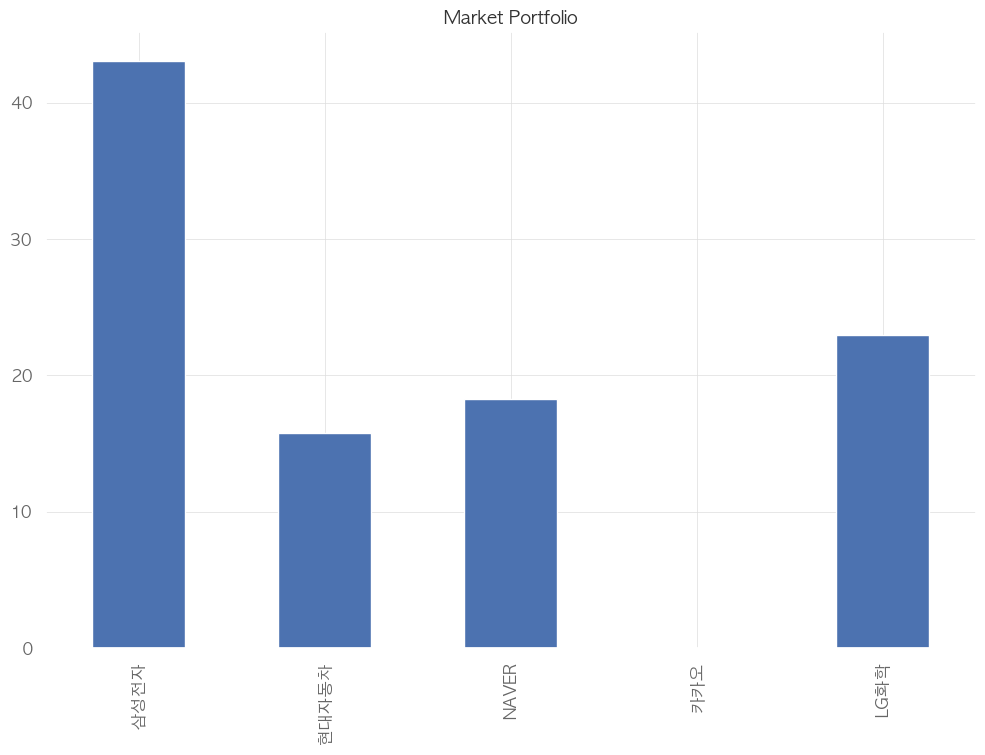

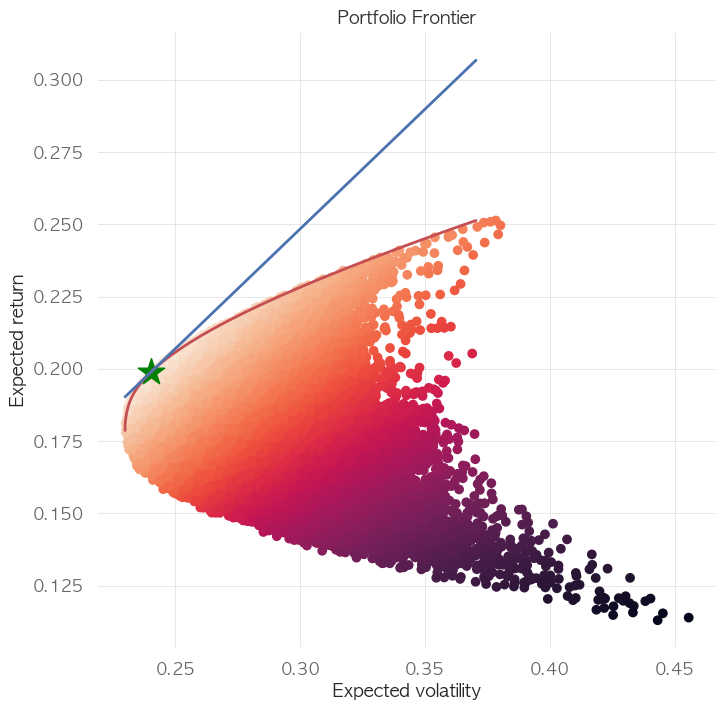

In [34]:
kp_port = kp.get_efficient_frontier(100000)

# Portfolio

## EW (equally weighted)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import KospiAnalyzer
import KospiCAPM
from scipy.optimize import minimize
import seaborn as sns

In [36]:
def get_returns(tickers, start_date=None, end_date=None):
    ka = KospiAnalyzer.KospiTicker()
    data = pd.DataFrame()
    for ticker in tickers:
        df = ka.get_daily_price(ticker, start_date, end_date)
        df.drop(['code', 'open', 'high', 'low', 'diff'], inplace=True, axis=1)
        df.index = pd.to_datetime(df.index)
        df = df.resample('M').last()
        data[ticker] = df['close'] 
    
    data.index = pd.to_datetime(data.index)
    print(data)

    # returns
    rets = data.pct_change().fillna(0)
    print(rets)

    return rets


In [37]:
tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', 'LG화학']
rets = get_returns(tickers, '2001-01-01')
rets

end_date is initialized to '2023-06-16'
end_date is initialized to '2023-06-16'
end_date is initialized to '2023-06-16'
end_date is initialized to '2023-06-16'
end_date is initialized to '2023-06-16'
              삼성전자   현대자동차     NAVER    카카오      LG화학
date                                                 
2001-01-31  220000   15350       NaN  33800       NaN
2001-02-28  187000   16000       NaN  29150       NaN
2001-03-31  208000   17200       NaN  23100       NaN
2001-04-30  229000   20600       NaN  37250   12800.0
2001-05-31  212000   25250       NaN  41700   18700.0
...            ...     ...       ...    ...       ...
2023-02-28   60600  176300  208500.0  62400  680000.0
2023-03-31   64000  184500  202000.0  61100  712000.0
2023-04-30   65500  197500  192300.0  58100  740000.0
2023-05-31   71400  200000  199500.0  56200  693000.0
2023-06-30   71500  199700  200500.0  53900  722000.0

[270 rows x 5 columns]
                삼성전자     현대자동차     NAVER       카카오      LG화학
date         

,삼성전자,현대자동차,NAVER,카카오,LG화학
date,,,,,
2001-01-31,0.000000,0.000000,0.000000,0.000000,0.000000
2001-02-28,-0.150000,0.042345,0.000000,-0.137574,0.000000
2001-03-31,0.112299,0.075000,0.000000,-0.207547,0.000000
2001-04-30,0.100962,0.197674,0.000000,0.612554,0.000000
2001-05-31,-0.074236,0.225728,0.000000,0.119463,0.460938
...,...,...,...,...,...
2023-02-28,-0.006557,0.055689,0.029630,0.016287,-0.014493
2023-03-31,0.056106,0.046512,-0.031175,-0.020833,0.047059
2023-04-30,0.023438,0.070461,-0.048020,-0.049100,0.039326


In [38]:
# tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', 'LG화학']
# ka = KospiAnalyzer.KospiTicker()
# data = pd.DataFrame()
# for ticker in tickers:
#     df = ka.get_daily_price(ticker, '2010-01-01')
#     df.drop(['code', 'open', 'high', 'low', 'diff'], inplace=True, axis=1)
#     df.index = pd.to_datetime(df.index)
#     df = df.resample('M').last()
#     data[ticker] = df['close']
#     print(data)
#     # data[ticker] = data[ticker].droplevel(0, axis=1).resample('M').last()

# data.index = pd.to_datetime(data.index)
# data

# # data = pd.DataFrame(df['close'].resample('M').last())
# # data

In [39]:
# calculate wieghts
def get_ew_weights(rets):
    noa = len(rets.columns)
    weights = np.ones_like(rets) * (1/noa)
    return weights

# equal weights
weights = get_ew_weights(rets)[-1]
# weights_df = pd.Series(weights, index=tickers)
# weights_df

In [40]:
def plot_pie_chart(weights, tickers):
    # weight series
    weights_df = pd.Series(weights, index=tickers)
    weights_df = weights_df[weights_df > 0]

    # color pallete
    pal = sns.color_palette('Spectral', len(weights))
    plt.figure(figsize=(8, 8))
    wedgeprops = {
        'width': 0.32,
        'edgecolor': 'w',
        'linewidth': 3
    }
    plt.pie(weights_df, labels=weights_df.index, autopct='%1.1f%%', wedgeprops=wedgeprops, colors=pal)
    plt.show()


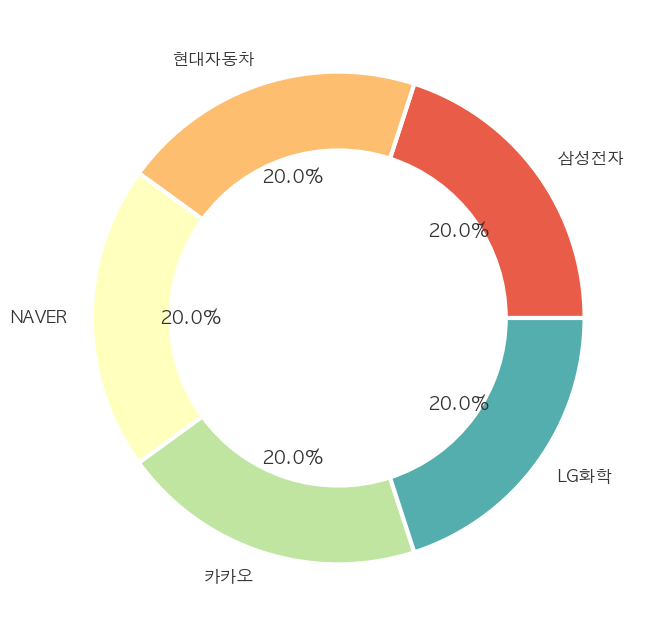

In [41]:
plot_pie_chart(weights, tickers)

In [42]:
# # visualize pie chart
# plt.figure(figsize=(10, 10))
# wedgeprops = {
#     'width': 0.32,
#     'edgecolor': 'w',
#     'linewidth': 3
# }
# plt.pie(weights, labels=tickers, autopct='%.2f%%', wedgeprops=wedgeprops, colors=pal)
# plt.show()

In [43]:
def plot_weights_timeseies(weights):

    # color pallete
    pal = sns.color_palette('Spectral', weights.shape[1])
    
    plt.figure(figsize=(20, 5))
    plt.stackplot(weights.index, weights.T, labels=weights.columns, colors=pal)
    plt.legend(loc='upper left')
    plt.title('Date')
    plt.xlabel('Date')
    plt.ylabel('Weights')
    plt.show()

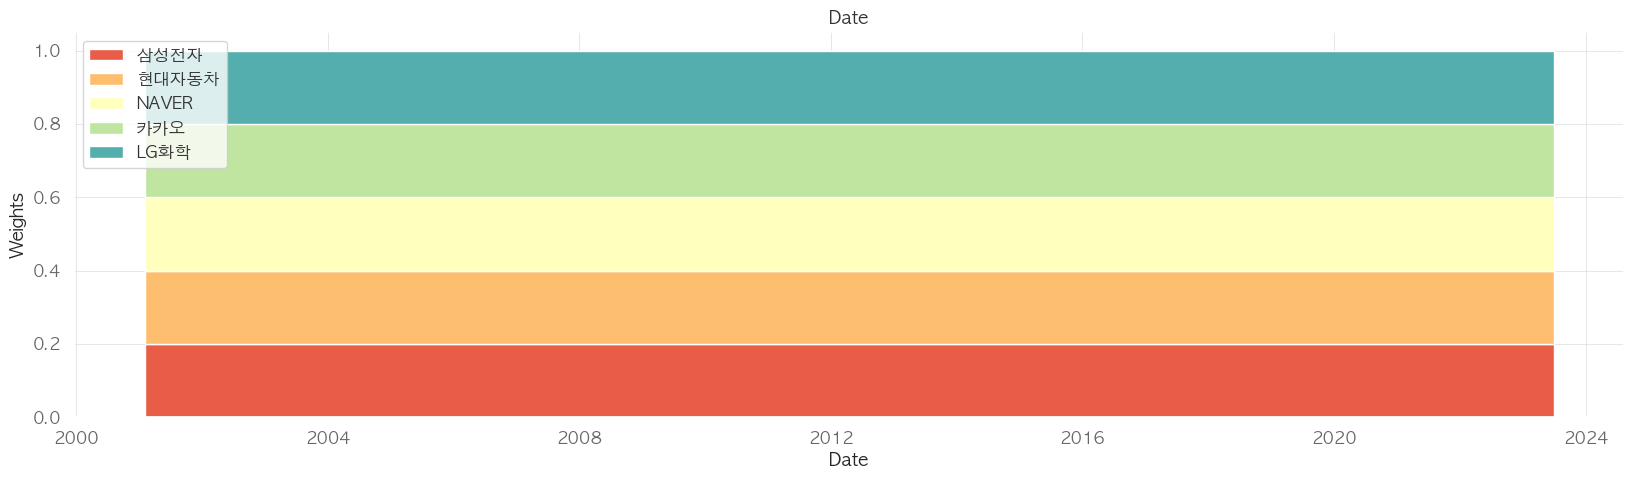

In [44]:
# timeseries weights dataframe
ew_w_df = pd.DataFrame(get_ew_weights(rets), index=rets.index, columns=rets.columns)

plot_weights_timeseies(ew_w_df)

# # plot
# plt.figure(figsize=(20, 5))
# plt.stackplot(ew_w_df.index, ew_w_df.T, labels=ew_w_df.columns, colors=pal)
# plt.legend(loc='upper left')
# plt.title('Date')
# plt.xlabel('Date')
# plt.ylabel('Weights')

In [45]:
def backtesting(weights, rets):
    # portfolio returns
    port_rets = weights.shift(1) * rets

    ## portfolio cumulative returns
    port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

    # plot graph
    plt.plot(port_cum_rets)
    plt.title('Backtest')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()

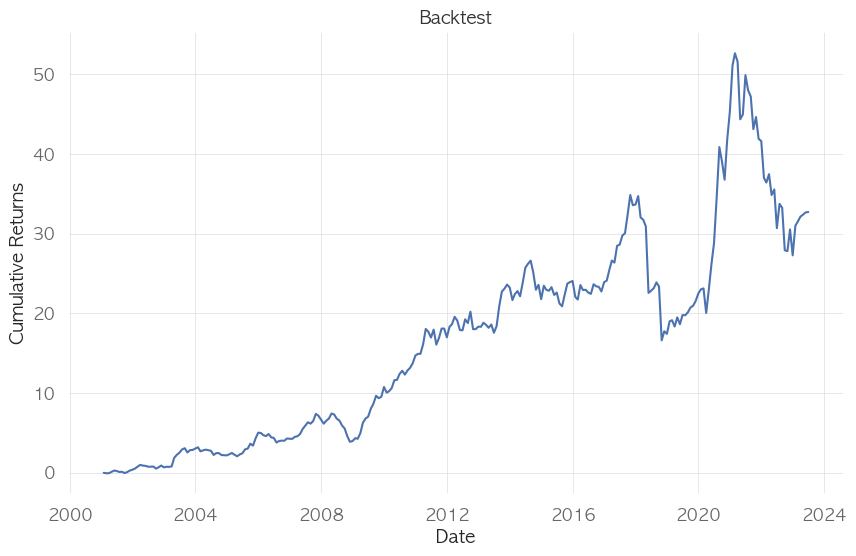

In [46]:
backtesting(ew_w_df, rets)

In [47]:
# # backtesting
# ## ew portfolio returns
# port_rets = ew_w_df.shift(1) * rets

# ## ew portfolio cumulative returns
# port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

# # plot graph
# plt.plot(port_cum_rets)
# plt.title('EW Backtest')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')

## Maximizing sharpe ratio

### 샤프 비율 최대화 (MSR, Max Sharpe Ratio) - MVO 계열

- 포트폴리오의 샤프비율을 최대화로 만들어주는 포트폴리오

- 해리 마코위츠(1952)의 포트폴리오이자 시장 포트폴리오(CAPM)
    - 효율적 경계선 자본시장선의 접점에서 포트폴리오가 시장 포트폴리오
    - 현금 비중이 0이라고 하면 자본시장선의 기울기가 샤프비율


- 최적화 문제 : 샤프비율 최대화

- 입력변수 : 수익률 벡터, 공분산 행렬(=변동성+상관관계)

$$Maximize:\text{ }SR_p=\frac{\mu_p-r_f}{\sigma_p}=\frac{\mathbf{w^TR}}{\sqrt{\mathbf{w^T\Sigma w}}}$$

- 코너해(corner solution)가 빈번하게 발생 : 여러 자산이 존재하더라도 한 두개 자산에 투자 비중 집중 → 입력변수에 작은 변화에 출력이 급격하게 변화

In [48]:
# # initializing weights
# noa = rets.shape[1]
# init_guess = np.repeat(1/noa, noa)

# # expected return vector
# er = rets.mean() * 12

# # covariance matrix
# cov = rets.cov() * 12

# # weights boundary
# bounds = ((0.0, 1.0),) * noa

# # constraints : imposibility of leverage
# weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

# # objective function : negative sharpe ratio
# def neg_sharpe_ratio(weights, er, cov):
#     r = weights.T @ er
#     vol = np.sqrt(weights.T @ cov @ weights)
#     return -r / vol

# # optimization
# res = minimize(neg_sharpe_ratio,
#                init_guess,
#                args=(er, cov),
#                method='SLSQP',
#                constraints=(weights_sum_to_1),
#                bounds=bounds)

# # optimal weights
# weights = res.x

# print(weights)

In [49]:
# # 초기값 설정
# noa = rets.shape[1]
# init_guess = np.repeat(1/noa, noa)

# # 기대수익률 벡터
# er = rets.mean() * 12

# # 공분산행렬
# cov = rets.cov() * 12

# # 각 ETF별 투자 가중치 상하한선 : 공매도 불가 조건
# bounds = ((0.0, 1.0), ) * noa

# # 제약조건 : 전체 가중치의 합이 1, 레버리지 불가 조건
# weights_sum_to_1 = {'type': 'eq',
#                     'fun': lambda weights: np.sum(weights) - 1}

# # 목적함수 : 마이너스 샤프비율
# def neg_sharpe(weights, er, cov):
#     r = weights.T @ er
#     vol = np.sqrt(weights.T @ cov @ weights)
#     return - r / vol

# # 최적화 알고리즘 구동
# res = minimize(neg_sharpe,
#                init_guess,
#                args=(er, cov),
#                method='SLSQP',
#                constraints=(weights_sum_to_1,),
#                bounds=bounds)

# # 가중치 결과값
# weights = res.x

# # 결과 출력
# print(weights)

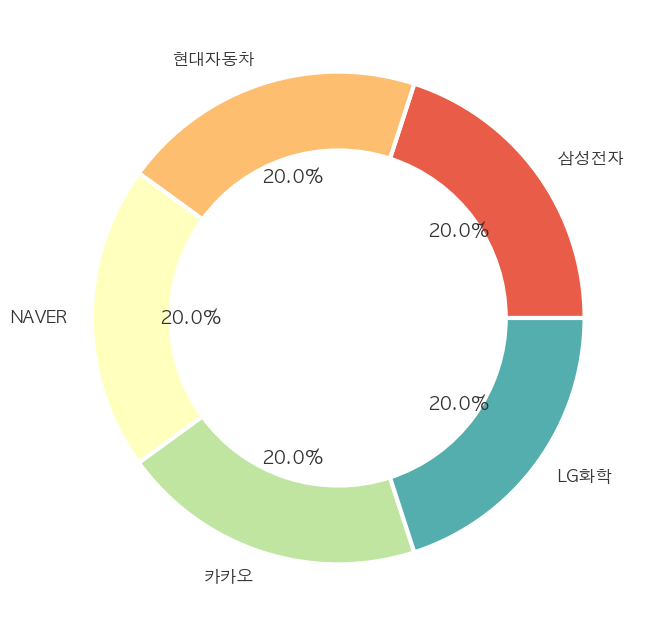

In [50]:
# plot msr pie chart
plot_pie_chart(weights, tickers)

In [51]:
# function for calculating MSR model
def get_msr_weights(er, cov):
    # number of assets
    noa = er.shape[0]

    # initializing weights
    init_guess = np.repeat(1/noa, noa)

    # weights boundary
    bounds = ((0.0, 1.0), ) * noa


    # constraints : imposibility of leverage
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}

    # objective function : negative sharpe ratio
    def neg_sharpe(weights, er, cov):
        r = weights.T @ er
        vol = np.sqrt(weights.T @ cov @ weights)
        return - r / vol

    # optimization
    res = minimize(neg_sharpe,
                init_guess,
                args=(er, cov),
                method='SLSQP',
                constraints=(weights_sum_to_1),
                bounds=bounds)
    
    return res.x


In [52]:
# dataframe for timeseries weights
msr_w_df = pd.DataFrame().reindex_like(rets)

# expected return vector
er = np.array(rets * 12)

# covariance matrix
cov = rets.rolling(12).cov().fillna(0) * 12
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

for i in range(12, len(msr_w_df)):
    msr_w_df.iloc[i] = get_msr_weights(er[i-1], cov[i-1])

msr_w_df

,삼성전자,현대자동차,NAVER,카카오,LG화학
date,,,,,
2001-01-31,NaN,NaN,NaN,NaN,NaN
2001-02-28,NaN,NaN,NaN,NaN,NaN
2001-03-31,NaN,NaN,NaN,NaN,NaN
2001-04-30,NaN,NaN,NaN,NaN,NaN
2001-05-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-02-28,0.185929,0.686946,8.336687e-17,1.271247e-01,0.000000e+00
2023-03-31,0.000000,1.000000,2.775558e-16,5.551115e-17,1.665335e-16
2023-04-30,0.392279,0.607721,2.607271e-13,2.767490e-13,2.840098e-13


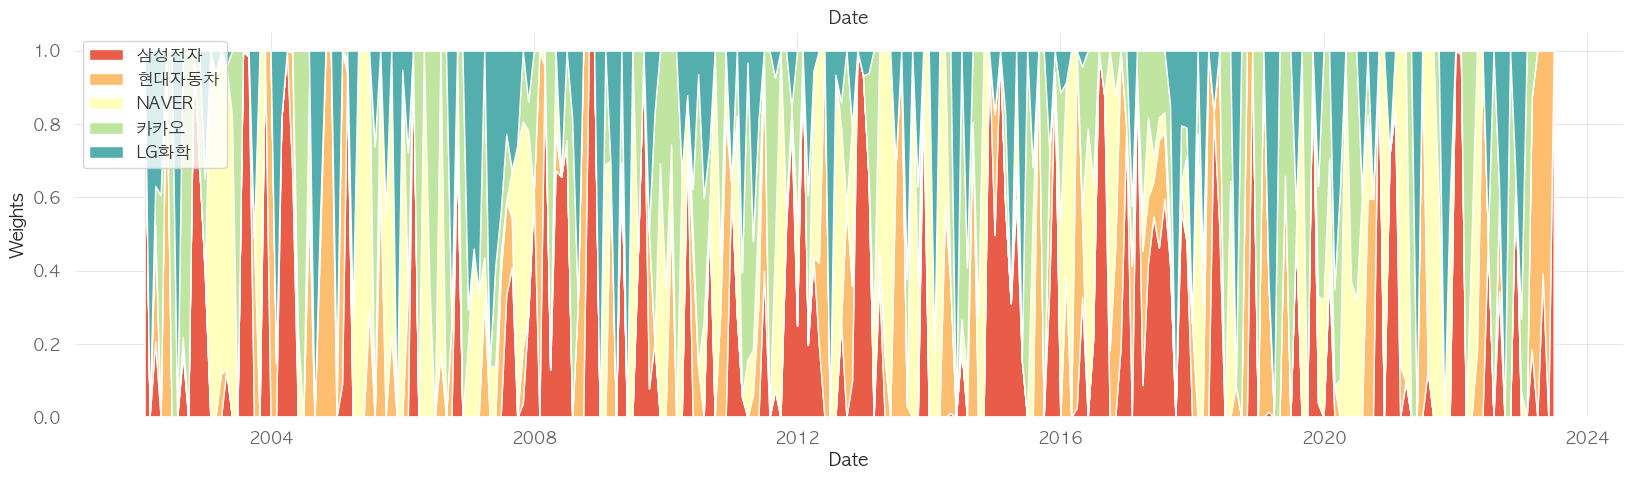

In [53]:
# weight plot
plot_weights_timeseies(msr_w_df)

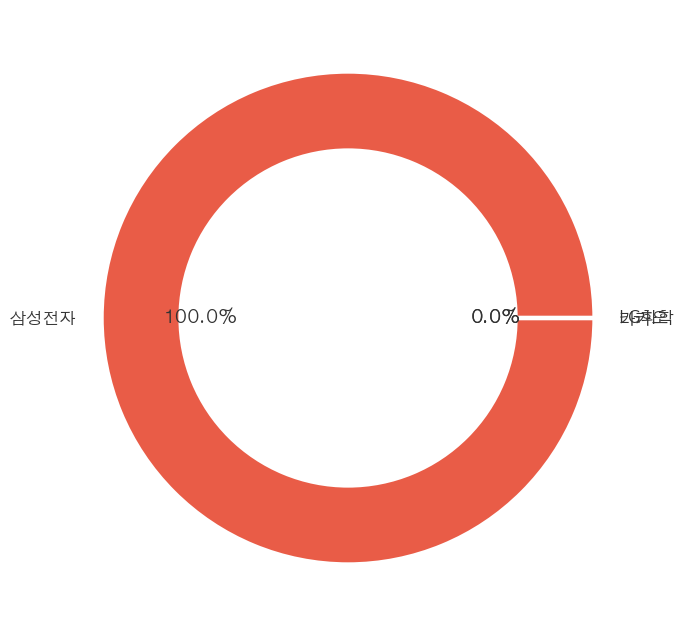

In [54]:
plot_pie_chart(msr_w_df.iloc[-1], tickers)

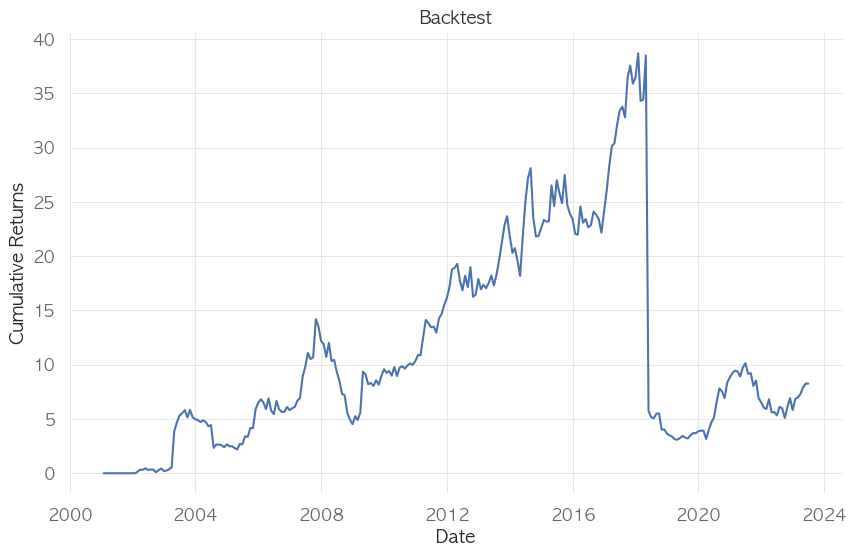

In [55]:
backtesting(msr_w_df, rets)

## Global minimum variance

- 포트폴리오의 변동성을 최소화하는 포트폴리오

- 효율적 경계선에서 분산이 가장 낮은 포트폴리오

- 최적화의 문제 : 포트폴리오 변동성 최소화

- 입력변수 : 공분산 행렬

$$Minimize : \text{ } \sigma_p=\sqrt{\mathbf{w^T\Sigma w}}$$

- 코너해 현상이 빈번하게 발생 : 포트폴리오의 변동성을 최소화하려면 위험 자산 대부분을 걸러야 함


In [56]:
# rets.shape

In [57]:
# # setting initial weights
# noa = rets.shape[1]
# init_guess = np.repeat(1/noa, noa)

# # covariance matrix
# cov = rets.cov() * 12

# # weights boundary
# bounds = ((0.0, 1.0),) * noa

# # constraints : imposibility of leverage
# weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

# # objective function : portfolio volatility
# def portfolio_vol(weights, cov):
#     vol = np.sqrt(weights.T @ cov @ weights)
#     return vol

# # optimization
# res = minimize(portfolio_vol,
#                init_guess,
#                args=(cov,),
#                method='SLSQP',
#                constraints=(weights_sum_to_1),
#                bounds=bounds)
# weights = res.x

In [58]:
# plot_pie_chart(weights, tickers)

In [59]:
# function for calculating GMV model
def get_gmv_weights(cov):

    # number of assets
    noa = cov.shape[0]

    # initializing weights
    init_guess = np.repeat(1/noa, noa)

    # weights boundary
    bounds = ((0.0, 1.0), ) * noa

    # constraints : imposibility of leverage
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}

    # objective function : portfolio volatility
    def port_vol(weights, cov):
        vol = np.sqrt(weights.T @ cov @ weights)
        return vol

    # optimization
    res = minimize(port_vol,
                init_guess,
                args=(cov,),
                method='SLSQP',
                constraints=(weights_sum_to_1),
                bounds=bounds)
    
    return res.x

In [60]:
# dataframe for timeseries weights
gmv_w_df = pd.DataFrame().reindex_like(rets)

# covariance matrix
cov = rets.rolling(12).cov().fillna(0) * 12
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

# calculating weights
for i in range(12, len(gmv_w_df)):
    gmv_w_df.iloc[i] = get_gmv_weights(cov[i-1])

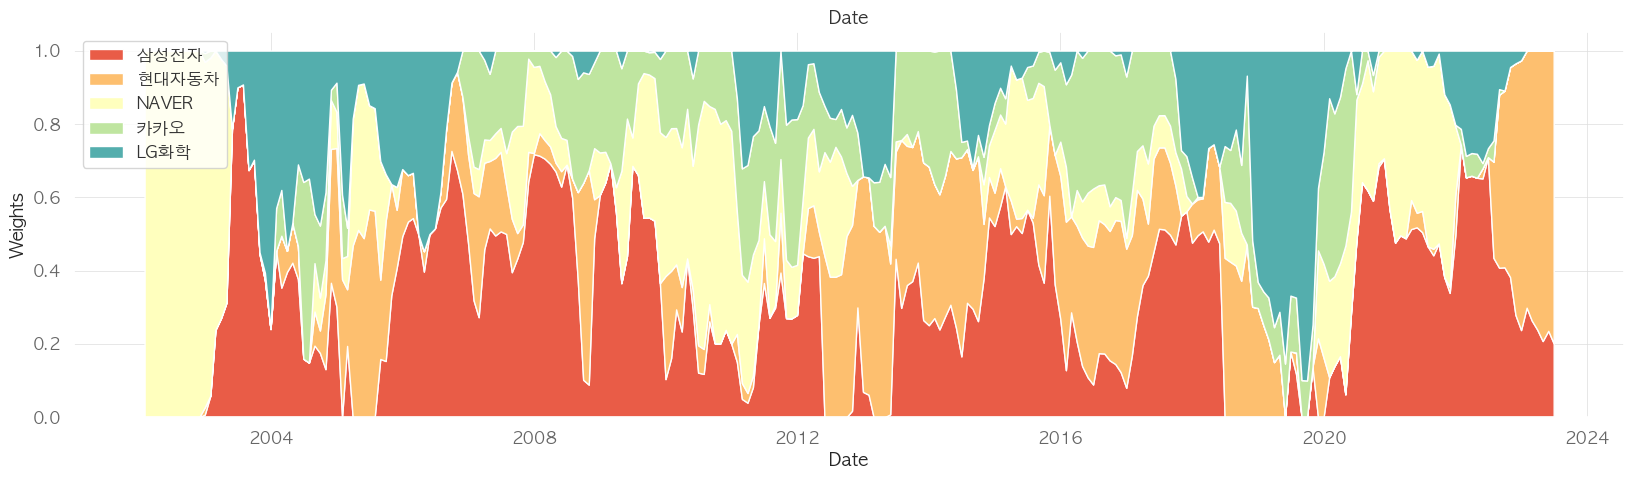

In [61]:
plot_weights_timeseies(gmv_w_df)

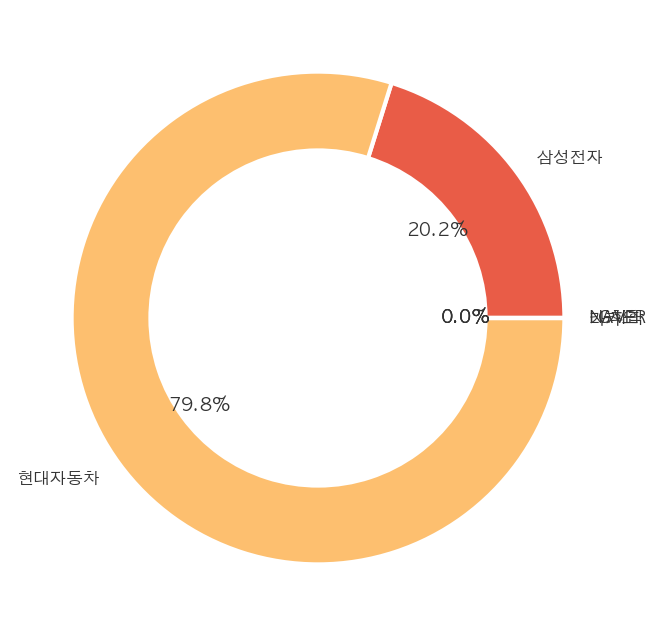

In [62]:
plot_pie_chart(gmv_w_df.iloc[-1], tickers)

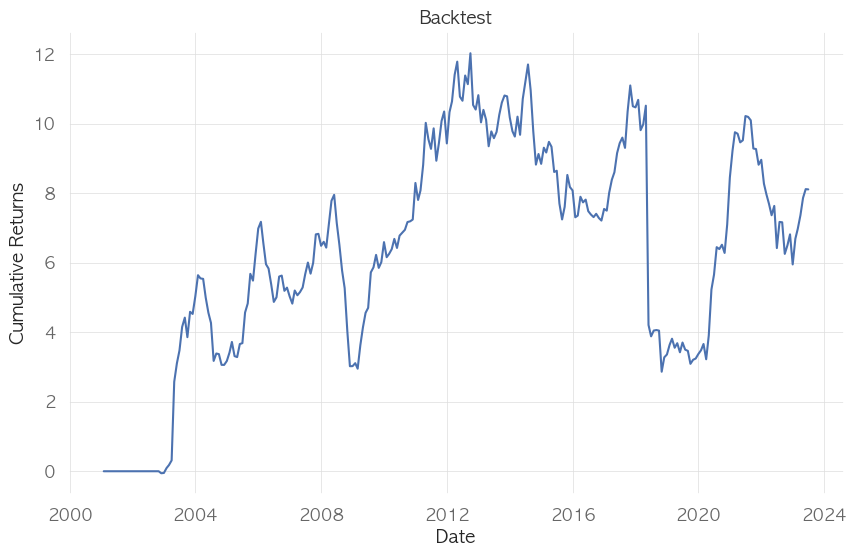

In [63]:
backtesting(gmv_w_df, rets)

# MDP (most diversified portfolio) - MVO 계열

- 포트폴리오의 분산비율을 최대화하는 포트폴리오

- 상관관계를 중요하게 취급

- 쉐퍼티와 쾨냐(2008)의 포트폴리오

- 최적화 문제 : 분산비율(DR, Diversification Ratio)의 최대화

- 입력변수 : 공분산 행렬, 변동성 벡터

$$Maximize :DR=\frac{\mathbf{w^T\sigma}}{\mathbf{w^T\Sigma w}}$$

- 분모 : 포트폴리오 전체 분산 값 / 분자 : $\sigma$는 개별자산의 분산이므로, $\mathbf{w^T\sigma}$는 자산간 상관계수 0이라고 가정했을 때 포트폴리오 분산

- DR를 낮추기 위해서는 개별 자산 변동헝($\sigma$)이 고정이라고 하면 포트폴리오 분산을 낮춰야 하며, 상관계수를 낮춰야 함 → 상관계수 낮은 자산들로 포트폴리오구성

- 코너 솔루션 발생

In [64]:
# # MDP (most diversified portfolio) model

# # covariance matrix
# cov = np.array(rets.cov() * 12)

# # volatility of each asset
# vol = np.diag(cov)

# # initializing weights
# noa = rets.shape[1]
# init_guess = np.repeat(1/noa, noa)

# # weights boundary
# bounds = ((0.0, 1.0), ) * noa

# # constraints : imposibility of leverage
# weights_sum_to_1 = {'type': 'eq',
#                     'fun': lambda weights: np.sum(weights) - 1}

# # objective function : portfolio volatility
# def neg_div_ratio(weights, vol, cov):
#     weighted_vol = weights.T @ vol
#     port_vol = np.sqrt(weights.T @ cov @ weights)
#     return - weighted_vol / port_vol

# # optimization
# res = minimize(neg_div_ratio,
#                init_guess,
#                args=(vol, cov),
#                method='SLSQP',
#                constraints=(weights_sum_to_1),
#                bounds=bounds)
# weights = res.x


In [65]:
# # plot pie chart
# plot_pie_chart(weights, tickers)

In [66]:
# function for calculating MDP model
def get_mdp_weights(cov):

    # volatility of each asset
    vol = np.diag(cov)

    # number of assets
    noa = cov.shape[0]

    # initializing weights
    init_guess = np.repeat(1/noa, noa)

    # weights boundary
    bounds = ((0.0, 1.0), ) * noa
    
    # constraints : imposibility of leverage
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}
    
    # objective function : minimum diversification ratio
    def neg_div_ratio(weights, vol, cov):
        weighted_vol = weights.T @ vol
        port_vol = np.sqrt(weights.T @ cov @ weights)
        return - weighted_vol / port_vol
    
    # optimization
    res = minimize(neg_div_ratio,
                   init_guess,
                   args=(vol, cov),
                   constraints=(weights_sum_to_1),
                   bounds=bounds)
    
    return res.x

In [67]:
mdf_W_df = pd.DataFrame().reindex_like(rets)

# covariance matrix
cov = rets.rolling(12).cov().fillna(0) * 12
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

# calculating weights
for i in range(12, len(mdf_W_df)):
    mdf_W_df.iloc[i] = get_mdp_weights(cov[i-1])

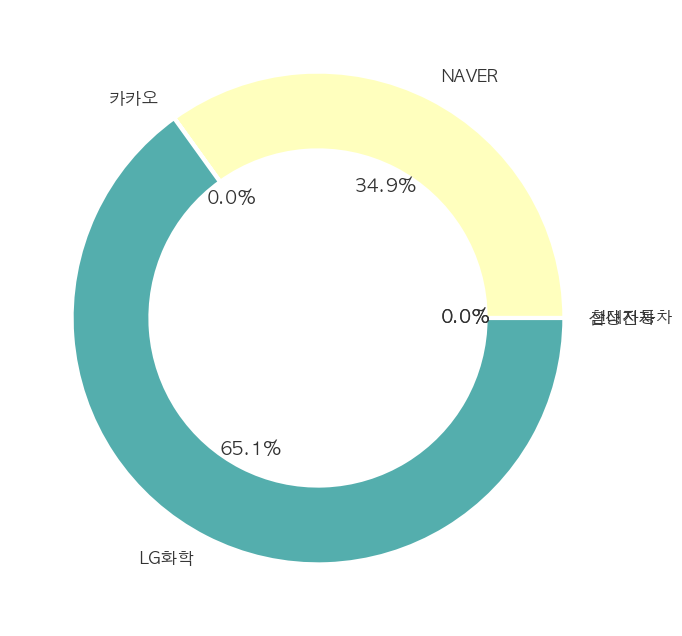

In [68]:
plot_pie_chart(mdf_W_df.iloc[-1], tickers)

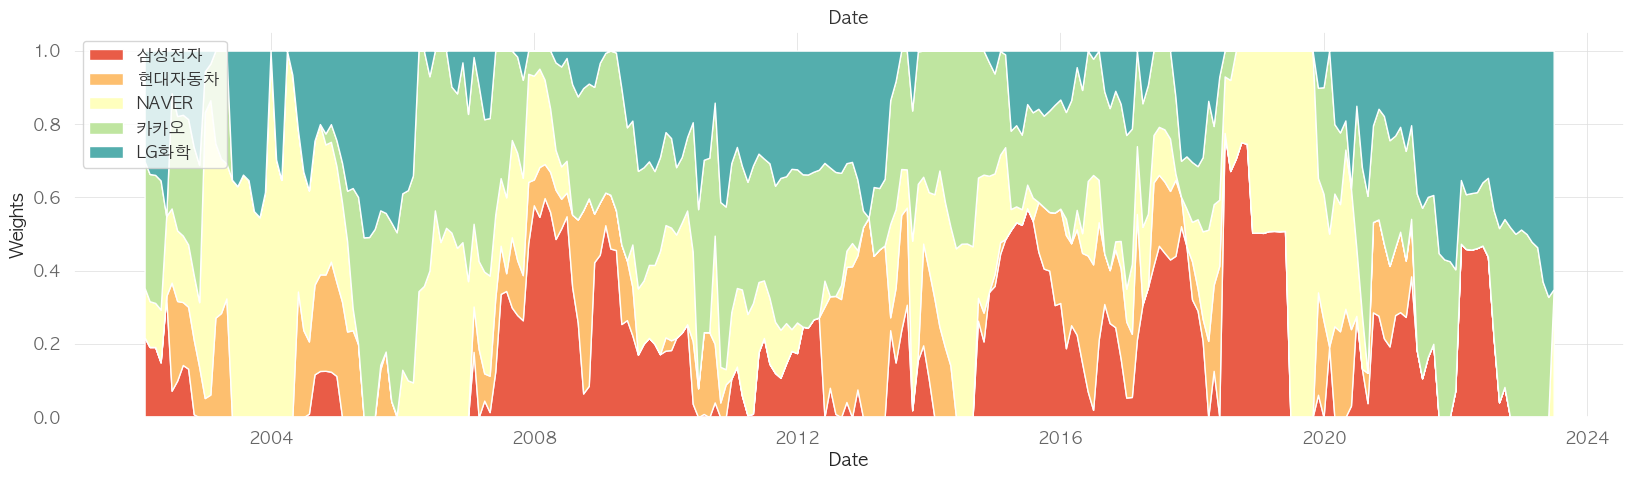

In [69]:
plot_weights_timeseies(mdf_W_df)

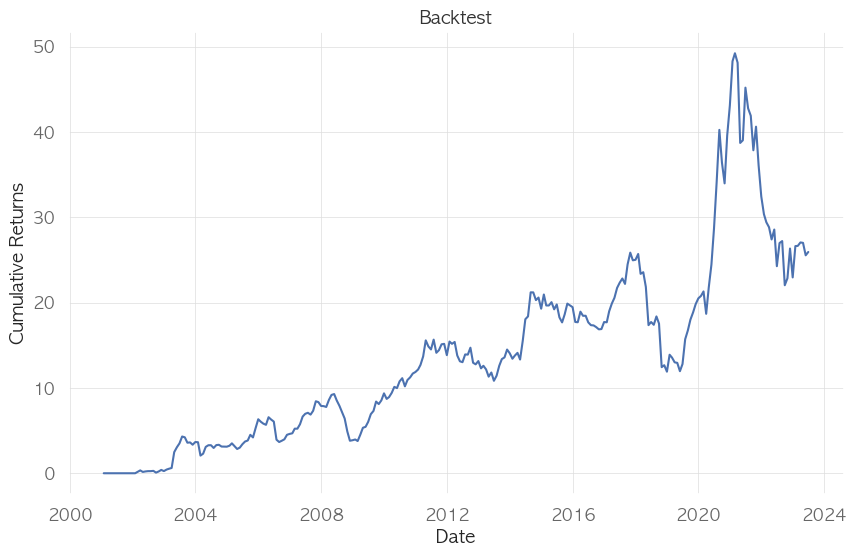

In [70]:
backtesting(mdf_W_df, rets)

# Risk parity

- 각 자산의 위험 기여도를 동일하게 만들어주는 포트폴리오. 위험 관점에서 균형을 이룬 포트폴리오

- 최적화 문제 : 자산별 위험 예산과 동일 비중 간 괴리 최소화

- 입력변수 : 공분산 행렬
    - 리스크 버짓팅과 비교해보면 $s_i$ 가 $1/N$으로 변경됨 → 주관적 위험 예산 타겟($s_i$)이 위험 기여도를 동일하게 만드는 형태인 $1/N$로 변경

$$Minimize:\sum_{i=1}^N\left(w_i\frac{\mathbf{(\Sigma w)_i}}{\sigma_p^2}-1/N\right)^2$$

In [71]:
# covariance matrix
cov = rets.cov() * 12

def get_rp_weights(cov):

    # number of assets
    noa = cov.shape[0]

    # initializing weights
    init_guess = np.repeat(1/noa, noa)

    # weights boundary
    bounds = ((0.0, 1.0), ) * noa

    # constraints : imposibility of leverage
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}
    
    # target risk
    target_risk = np.repeat(1/noa, noa)

    # objective function : portfolio volatility
    def msd_risk(weights, target_risk, cov):
        port_var = weights.T @ cov @ weights
        marginal_contribs = cov @ weights

        risk_contribs = np.multiply(marginal_contribs, weights.T) / port_var

        return ((risk_contribs - target_risk) ** 2).sum()

    # optimization
    res = minimize(msd_risk,
                init_guess,
                args=(target_risk, cov,),
                method='SLSQP',
                constraints=(weights_sum_to_1),
                bounds=bounds)
    
    return res.x

In [72]:
# dataframe for timeseries weights
rp_w_df = pd.DataFrame().reindex_like(rets)

# covariance matrix
cov = rets.rolling(12).cov().fillna(0) * 12
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

# calculating weights
for i in range(12, len(rp_w_df)):
    rp_w_df.iloc[i] = get_rp_weights(cov[i-1])

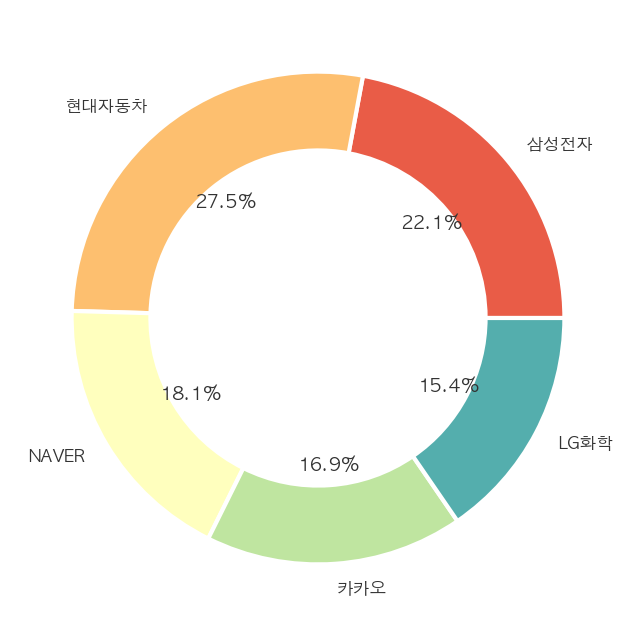

In [73]:
plot_pie_chart(rp_w_df.iloc[-1], tickers)

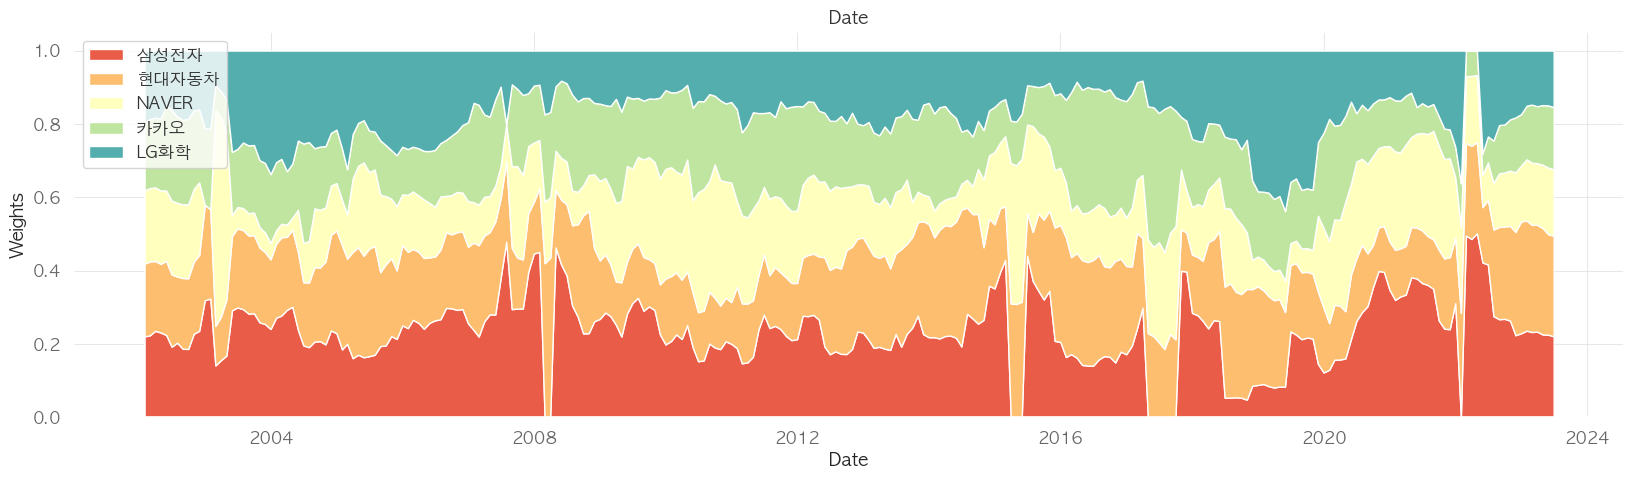

In [74]:
plot_weights_timeseies(rp_w_df)

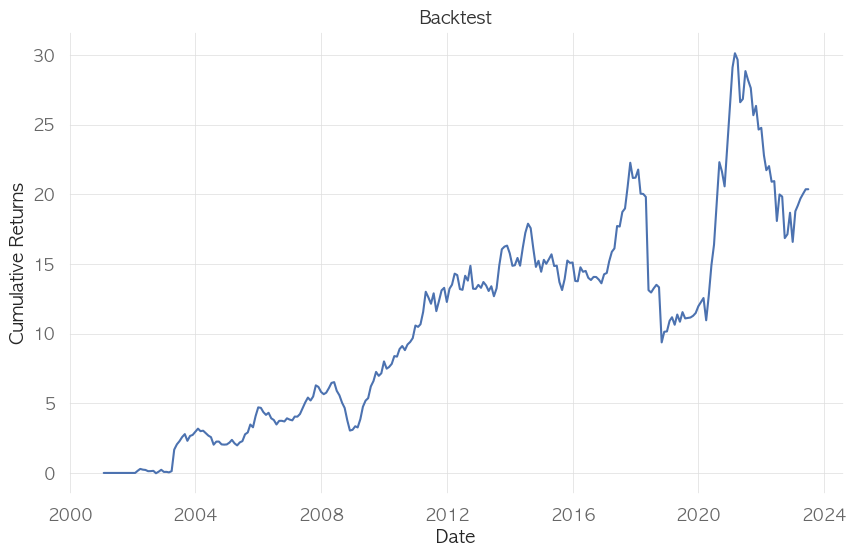

In [75]:
backtesting(rp_w_df, rets)

# Equally Marginal Volatility (EMV) model = IV(inverse volatility) model

- 자산간 상관계수가 0이라고 가정할 때, 각 자산의 위험 기여도를 동일하게 만들어주는 포트폴리오

- 최적화 문제: 자산간 상관계수가 0인 경우 자산별 위험 예산과 동일 비중간 괴리 최소화

- 입력 변수 : 변동성
    - 리스크 패러티와 비교시 첫번째 항에 상관계수가 없음
    - 상관관계가 0이 되면 최적화 솔루션을 구할 필요가 없음 → 투자 가중치에 대해 닫힌해(closed form solution) 존재
    - 어떤 자산에 대해 변동성이 크다면 투자 가중치를 줄이게 되고, 변동성이 작다면 투자 가중치를 늘리게 됨

$$Minimize : \sum_{i=1}^N\left(\frac{w_i^2\sigma_i^2}{\sigma_p^2}-1/N\right)^2\\w_i=\frac{1/\sigma_i}{\sum_{i=1}^N 1/\sigma_i}$$

In [76]:
# calculating volatility
vol = rets.std() * np.sqrt(12)

# inverse volatility
inv_vol = 1 / vol

# weights based on inverse volatility weighting
weights = inv_vol / inv_vol.sum()

In [77]:
weights

삼성전자     0.240297
현대자동차    0.247595
NAVER    0.127815
카카오      0.175364
LG화학     0.208928
dtype: float64

In [78]:
# function for calculating inverse volatility weights
def get_emv_weights(cov):

    # volatility of each asset
    vol = np.diag(cov)

    # inverse volatility
    inv_vol = 1 / vol

    # weights based on inverse volatility weighting
    weights = inv_vol / inv_vol.sum()

    return weights

In [79]:
# dataframe for timeseries weights
emv_w_df = pd.DataFrame().reindex_like(rets)

# covariance matrix
cov = rets.rolling(12).cov().fillna(0) * 12
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

# EMV weights
for i in range(12, len(emv_w_df)):
    emv_w_df.iloc[i] = get_emv_weights(cov[i-1])

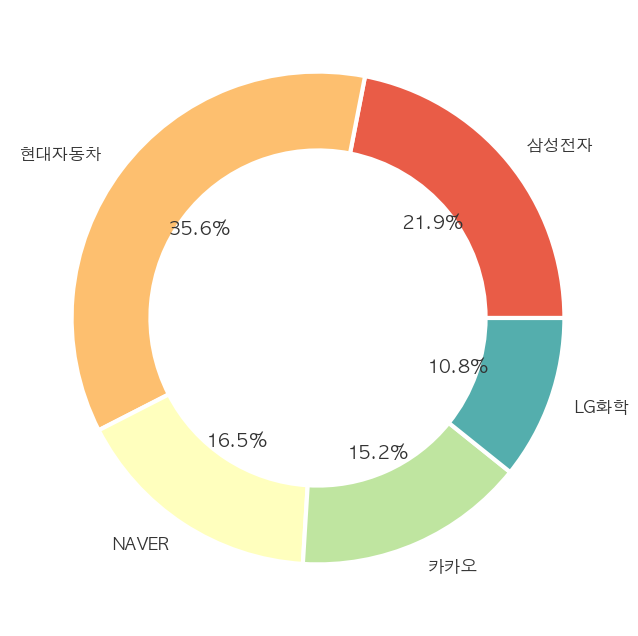

In [80]:
plot_pie_chart(emv_w_df.iloc[-1], tickers)

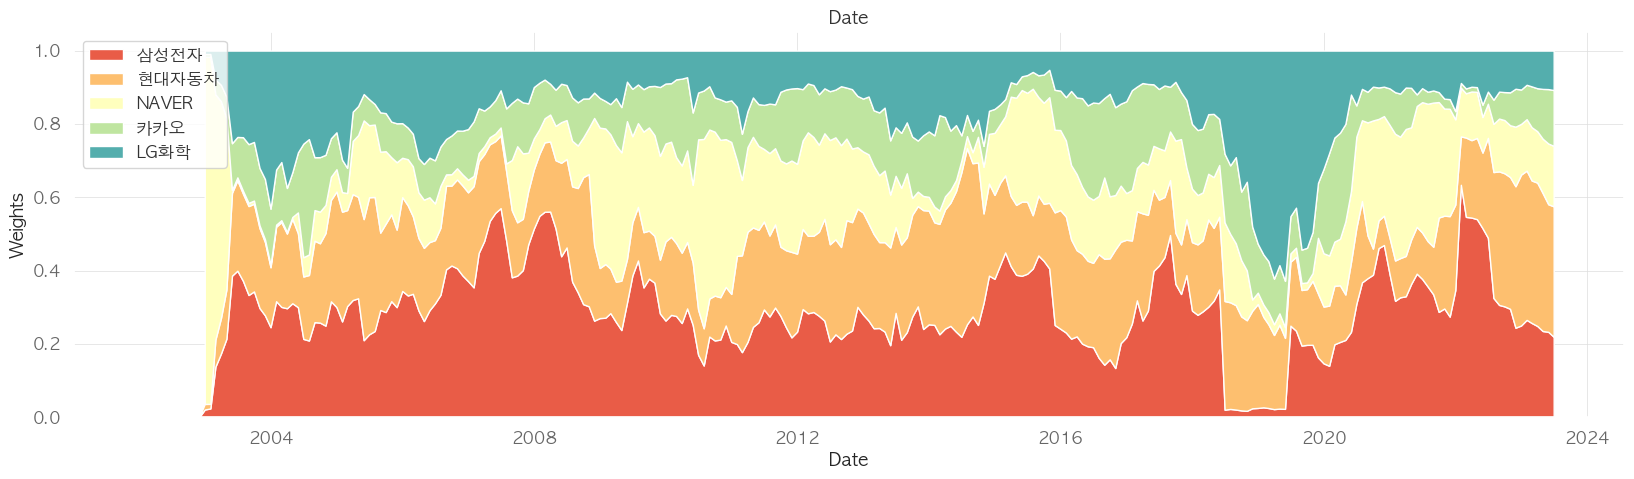

In [81]:
plot_weights_timeseies(emv_w_df)

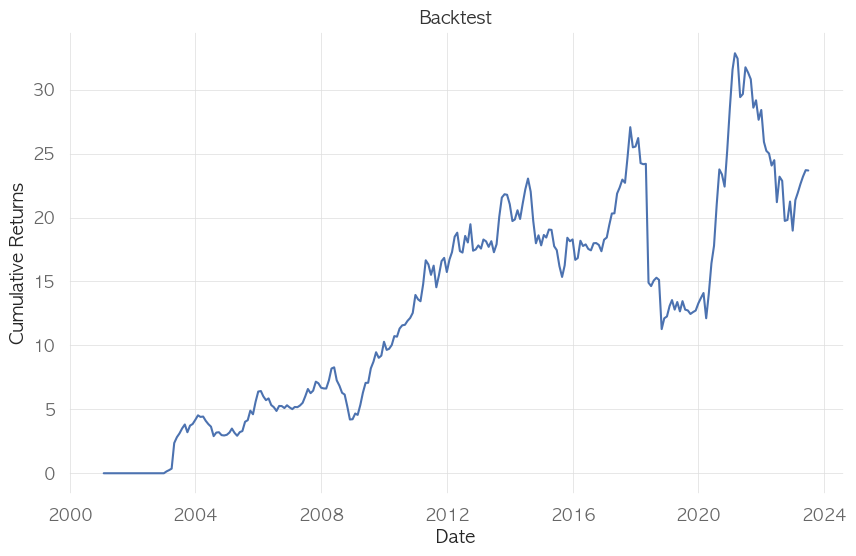

In [82]:
backtesting(emv_w_df, rets)

# 블랙-리터만 모형

- 피셔 블랙 & 로버트 리터만 (1990)

- 시장의 뷰와 투자자(개인)의 뷰를 결합한 방식의 포트폴리오 구성 방법 (펀드 매니저, 애널리스트)

- 액티브 펀드에서 주로 사용 → 주관적인 뷰를 도입 합리적인 투자

- 베이지안 통계 접근법

- MVO와 거의 유사하나 분포를 도출하는 과정이 새롭게 도입

In [83]:
# # return vector and covariance matrix
# ret_vec = rets.mean() * 52
# cov_mat = rets.cov() * 52

In [84]:
# tickers

In [85]:
# # total asset
# cap_list = []
# naver_cap = 164049085 * 200500
# samsung_cap = 5969782550 * 71000
# hyundai_cap = 211531506 * 196200
# lg_cap = 70592343 * 746000
# kakao_cap = 444104206 * 56600

# cap_names = [samsung_cap, hyundai_cap, naver_cap, kakao_cap, lg_cap]

# for cap_name in cap_names:
#     cap_list.append(cap_name)
# cap_list


In [86]:
# # market cap weighted portfolio
# caps = cap_list
# caps_df = pd.Series(caps, index=tickers)
# market_weights_df = caps_df / caps_df.sum()
# market_weights_df

In [87]:
# plot_pie_chart(market_weights_df, tickers)

In [88]:
# # market portfolio rets and vol
# market_port_ret = ret_vec.multiply(market_weights_df.values).sum()
# market_port_var = np.matmul(market_weights_df.values.reshape(len(market_weights_df)).T, np.matmul(cov_mat.values, market_weights_df.values.reshape(len(market_weights_df))))

# print(market_port_ret, market_port_var)

In [89]:
# # risk averison coefficient
# mkt_lambda = market_port_ret / np.sqrt(market_port_var)
# print(mkt_lambda)

In [90]:
# # reverse optimization
# pi = np.dot(np.dot(mkt_lambda, cov_mat), market_weights_df)
# pi_df = pd.Series(pi, index=tickers)
# pi_df

In [91]:
# # investor's expected return
# Q = np.array([0.09565, 0.005, 0.055])
# P = [[0, 0, 0, 0, 1],
#      [0, 0, 0, 1, 0],
#      [-1, 0, 1, 0, 0]]

# # risk adjustment coefficient
# tau = 1 / len(data) * 52

# # investor's expectation uncertainty
# omega = np.diag(np.diag(np.dot(np.dot(np.dot(tau, P), cov_mat), np.transpose(P))))
# omega

In [92]:
# # optimal portfolio
# term1 = np.linalg.inv(np.dot(tau, cov_mat))
# term2 = np.dot(np.dot(np.transpose(P), np.linalg.inv(omega)), P)
# term3 = np.dot(np.linalg.inv(np.dot(tau, cov_mat)), pi)
# term4 = np.dot(np.dot(np.transpose(P), np.linalg.inv(omega)), P)

# # after distribution
# bl_cov_mat = np.linalg.inv(term1 + term2)
# bl_ret_vec = np.dot(bl_cov_mat, (term3 + term4))

In [93]:
# # function for calculating Black-Litterman weights
# def get_bl_weights(er, cov):

#     # number of assets
#     noa = er.shape[0]

#     # initial guess
#     init_guess = np.repeat(1 / noa, noa)
    
#     # risk aversion coefficient
#     bounds = ((0.0, 1.0),) * noa

#     # wieghts bottom and top line
#     weights_sum_to_1 = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

#     # objective function
#     def neg_sharpe(weights, er, cov):
#         r = weights.T @ er
#         vol = np.sqrt(weights.T @ cov @ weights)
#         return -r / vol
    
#     # optimization
#     res = minimize(neg_sharpe,
#                    init_guess,
#                    args=(er, cov,),
#                    method='SLSQP',
#                    constraints=(weights_sum_to_1),
#                    bounds=bounds)
    
#     return res.x


In [94]:
# # BL portfolio weights
# bl_weights = get_bl_weights(bl_ret_vec, bl_cov_mat)

# # BL portfolio returns
# bl_ret = np.dot(bl_weights, bl_ret_vec)

# # BL portfolio volatility
# bl_vol = np.sqrt(np.dot(bl_weights.T, np.dot(bl_cov_mat, bl_weights)))
import datetime
from scipy.stats import norm

In [95]:
# # 패키지 임포트
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# from scipy.optimize import minimize
# import yfinance as yf
# import quantstats as qs
# from matplotlib import rc
# rc('font', family='AppleGothic')

# class PortOptimPy:

#     # initialize class
#     def __init__(self, tickers, start_date='2020-01-01', end_date=datetime.datetime.now().strftime('%Y-%m-%d'), param=52, cost=0.0005):

#         # annualization parameter
#         self.param = param

#         # start and end date
#         self.start_date = start_date
#         self.end_date = end_date

#         # tickers
#         self.tickers = tickers

#         # returns, expected returns, covariance matrix
#         self.rets, self.er, self.vol, cov = self.portfolio(self.start_date, self.end_date)

#         # covariance matrix
#         self.cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

#         self.cost = cost

#     def portfolio(self, start_date, end_date):
#         # load kospi tickers data
#         data = pd.DataFrame()
#         for ticker in self.tickers:
#             df = ka.get_daily_price(ticker, start_date, end_date)
#             data[ticker] = df['close']
        
#         # returns
#         rets = data.pct_change().fillna(0)
#         # expected returns (yearly)
#         er = rets.mean() * self.param
#         # volatility
#         vol = np.array(rets.rolling(self.param).std() * np.sqrt(self.param))
#         # covariance matrix (yearly)
#         cov = rets.rolling(self.param).cov() * self.param

#         return rets, er, vol, cov

#     # 횡적 배분 모델 클래스
#     class CrossSectional:

#         # EW
#         def ew(self, er):
#             noa = er.shape[0]
#             weights = np.ones_like(er) * (1/noa)
#             return weights
        
#         # MSR
#         def msr(self, er, cov):
#             noa = er.shape[0]
#             init_guess = np.repeat(1/noa, noa)

#             bounds = ((0.0, 1.0), ) * noa
#             weights_sum_to_1 = {'type': 'eq',
#                                 'fun': lambda weights: np.sum(weights) - 1}

#             def neg_sharpe(weights, er, cov):
#                 r = weights.T @ er
#                 vol = np.sqrt(weights.T @ cov @ weights)
#                 return - r / vol

#             weights = minimize(neg_sharpe,
#                             init_guess,
#                             args=(er, cov),
#                             method='SLSQP',
#                             constraints=(weights_sum_to_1,), 
#                             bounds=bounds)

#             return weights.x
        
#         # GMV
#         def gmv(self, cov):
#             noa = cov.shape[0]
#             init_guess = np.repeat(1/noa, noa)

#             bounds = ((0.0, 1.0), ) * noa
#             weights_sum_to_1 = {'type': 'eq',
#                                 'fun': lambda weights: np.sum(weights) - 1}

#             def port_vol(weights, cov):
#                 vol = np.sqrt(weights.T @ cov @ weights)
#                 return vol

#             weights = minimize(port_vol, init_guess, args=(cov), method='SLSQP', constraints=(weights_sum_to_1,), bounds=bounds)

#             return weights.x
        
#         # MDP
#         def mdp(self, vol, cov):
#             noa = vol.shape[0]
#             init_guess = np.repeat(1/noa, noa)
#             bounds = ((0.0, 1.0), ) * noa
            
#             weights_sum_to_1 = {'type': 'eq',
#                                 'fun': lambda weights: np.sum(weights) - 1}
            
#             def neg_div_ratio(weights, vol, cov):
#                 weighted_vol = weights.T @ vol
#                 port_vol = np.sqrt(weights.T @ cov @ weights)
#                 return - weighted_vol / port_vol
            
#             weights = minimize(neg_div_ratio, 
#                                init_guess, 
#                                args=(vol, cov),
#                                method='SLSQP',
#                                constraints=(weights_sum_to_1,), 
#                                bounds=bounds)
            
#             return weights.x
        
#         # RP
#         def rp(self, cov):
#             noa = cov.shape[0]
#             init_guess = np.repeat(1/noa, noa)
#             bounds = ((0.0, 1.0), ) * noa
#             target_risk = np.repeat(1/noa, noa)
            
#             weights_sum_to_1 = {'type': 'eq',
#                         'fun': lambda weights: np.sum(weights) - 1}
            
#             def msd_risk(weights, target_risk, cov):
                
#                 port_var = weights.T @ cov @ weights
#                 marginal_contribs = cov @ weights
                
#                 risk_contribs = np.multiply(marginal_contribs, weights.T) / port_var
                
#                 w_contribs = risk_contribs
#                 return ((w_contribs - target_risk)**2).sum()
            
#             weights = minimize(msd_risk, 
#                                init_guess,
#                                args=(target_risk, cov), 
#                                method='SLSQP',
#                                constraints=(weights_sum_to_1,),
#                                bounds=bounds)
#             return weights.x
        
#         # EMV
#         def emv(self, vol):
#             inv_vol = 1 / vol
#             weights = inv_vol / inv_vol.sum()
    
#             return weights
        
#     # 종적 배분 모델 클래스
#     class TimeSeries: 

#         # VT   
#         def vt(self, port_rets, param, vol_target=0.1):
#             vol = port_rets.rolling(param).std().fillna(0) * np.sqrt(param)
#             weights = (vol_target / vol).replace([np.inf, -np.inf], 0).shift(1).fillna(0)
#             weights[weights > 1] = 1
#             return weights
        
#         # CVT
#         def cvt(self, port_rets, param, delta=0.01, cvar_target=0.05):
#             def calculate_CVaR(rets, delta=0.01):
#                 VaR = rets.quantile(delta)    
#                 return rets[rets <= VaR].mean()
            
#             rolling_CVaR = -port_rets.rolling(param).apply(calculate_CVaR, args=(delta,)).fillna(0)
#             weights = (cvar_target / rolling_CVaR).replace([np.inf, -np.inf], 0).shift(1).fillna(0)
#             weights[weights > 1] = 1
#             return weights
        
#         # KL
#         def kl(self, port_rets, param):
#             sharpe_ratio = (port_rets.rolling(param).mean() * np.sqrt(param) / port_rets.rolling(param).std())
#             weights = pd.Series(2 * norm.cdf(sharpe_ratio) - 1, index=port_rets.index).fillna(0)
#             weights[weights < 0] = 0
#             weights = weights.shift(1).fillna(0)
#             return weights
        
#         # CPPI
#         def cppi(self, port_rets, m=3, floor=0.7, init_val=1):
#             n_steps = len(port_rets)
#             port_value = init_val
#             floor_value = init_val * floor
#             peak = init_val

#             port_history = pd.Series(dtype=np.float64).reindex_like(port_rets)
#             weight_history = pd.Series(dtype=np.float64).reindex_like(port_rets)
#             floor_history = pd.Series(dtype=np.float64).reindex_like(port_rets)

#             for step in range(n_steps):
#                 peak = np.maximum(peak, port_value)
#                 floor_value = peak * floor

#                 cushion = (port_value - floor_value) / port_value
#                 weight = m * cushion

#                 risky_alloc = port_value * weight
#                 safe_alloc = port_value * (1 - weight)
#                 port_value = risky_alloc * (1 + port_rets.iloc[step]) + safe_alloc

#                 port_history.iloc[step] = port_value
#                 weight_history.iloc[step] = weight
#                 floor_history.iloc[step] = floor_value

#             return weight_history.shift(1).fillna(0)
    
#     # 거래비용 함수
#     def transaction_cost(self, weights_df, rets_df, cost=0.0005):
#         # 이전 기의 투자 가중치
#         prev_weights_df = (weights_df.shift(1).fillna(0) * (1 + rets_df.iloc[self.param-1:,:])) \
#         .div((weights_df.shift(1).fillna(0) * (1 + rets_df.iloc[self.param-1:,:])).sum(axis=1), axis=0)

#         # 거래비용 데이터프레임
#         cost_df = abs(weights_df - prev_weights_df) * cost
#         cost_df.fillna(0, inplace=True)

#         return cost_df

#     # 백테스팅 실행 함수
#     def run(self, cs_model, ts_model, cost):
#         # 빈 딕셔너리
#         backtest_dict = {}
        
#         # 일별 수익률 데이터프레임
#         rets = self.rets
        
#         # 횡적 배분 모델 선택 및 실행
#         for i, index in enumerate(rets.index[self.param-1:]):
#             if cs_model == 'EW':
#                 backtest_dict[index] = self.CrossSectional().ew(self.er[i])
#             elif cs_model == 'MSR':
#                 backtest_dict[index] = self.CrossSectional().msr(self.er[i], self.cov[i])
#             elif cs_model == 'GMV':
#                 backtest_dict[index] = self.CrossSectional().gmv(self.cov[i])
#             elif cs_model == 'MDP':
#                 backtest_dict[index] = self.CrossSectional().mdp(self.vol[i], self.cov[i])
#             elif cs_model == 'EMV':
#                 backtest_dict[index] = self.CrossSectional().emv(self.vol[i])
#             elif cs_model == 'RP':
#                 backtest_dict[index] = self.CrossSectional().rp(self.cov[i])
        
#         # 횡적 가중치 데이터프레임
#         cs_weights = pd.DataFrame(list(backtest_dict.values()), index=backtest_dict.keys(), columns=rets.columns)
#         cs_weights.fillna(0, inplace=True)

#         # 횡적 배분 모델 자산 수익률
#         cs_rets = cs_weights.shift(1) * rets.iloc[self.param-1:,:]

#         # 횡적 배분 모델 포트폴리오 수익률
#         cs_port_rets = cs_rets.sum(axis=1)
        
#         # 종적 배분 모델 선택 및 실행
#         if ts_model == 'VT':
#             ts_weights = (self.TimeSeries().vt(cs_port_rets, self.param))
#         elif ts_model == 'CVT':
#             ts_weights = (self.TimeSeries().cvt(cs_port_rets, self.param))
#         elif ts_model == 'KL':
#             ts_weights = (self.TimeSeries().kl(cs_port_rets, self.param))
#         elif ts_model == 'CPPI':
#             ts_weights = (self.TimeSeries().cppi(cs_port_rets))
#         elif ts_model == None:
#             ts_weights = 1

#         # 최종 포트폴리오 투자 가중치
#         port_weights = cs_weights.multiply(ts_weights, axis=0)

#         # 거래비용 데이터프레임
#         cost = self.transaction_cost(port_weights, rets)

#         # 최종 포트폴리오 자산별 수익률
#         port_asset_rets = port_weights.shift() * rets - cost

#         # 최종 포트폴리오 수익률 
#         port_rets = port_asset_rets.sum(axis=1)
#         port_rets.index = pd.to_datetime(port_rets.index).strftime("%Y-%m-%d")

#         return port_weights, port_asset_rets, port_rets

#     # 성과분석 수행 함수
#     def performance_analytics(self, port_weights, port_asset_rets, port_rets, qs_report=False):
        
#         # 자산별 투자 가중치
#         plt.figure(figsize=(12, 7))
#         port_weights['Cash'] = 1 - port_weights.sum(axis=1)
#         plt.stackplot(port_weights.index, port_weights.T, labels=port_weights.columns)
#         plt.title('Portfolio Weights')
#         plt.xlabel('Date')
#         plt.ylabel('Weights')
#         plt.legend(loc='upper left')
#         plt.show()

#         # 자산별 누적 수익률
#         plt.figure(figsize=(12, 7))
#         plt.plot((1 + port_asset_rets).cumprod() - 1)
#         plt.title('Underlying Asset Performance')
#         plt.xlabel('Date')
#         plt.ylabel('Returns')
#         plt.legend(port_asset_rets.columns, loc='upper left')
#         plt.show()

#         # 포트폴리오 누적 수익률
#         plt.figure(figsize=(12, 7))
#         plt.plot((1 + port_rets).cumprod() - 1)
#         plt.title('Portfolio Performance')
#         plt.xlabel('Date')
#         plt.ylabel('Returns')
#         plt.show()

#         # QuantStats 성과분석 리포트 작성
#         if qs_report == True:
#             port_rets.index = pd.to_datetime(port_rets.index)
#             qs.reports.html(port_rets, output='./file-name.html')

In [96]:
import PortOptimizer as po

tickers = ['NAVER', '삼성전자', '현대자동차']
engine = po.PortOptimizer(tickers, '2020-01-01')

res = engine.run(cs_model='RP', ts_model='VT', cost=0.0005)

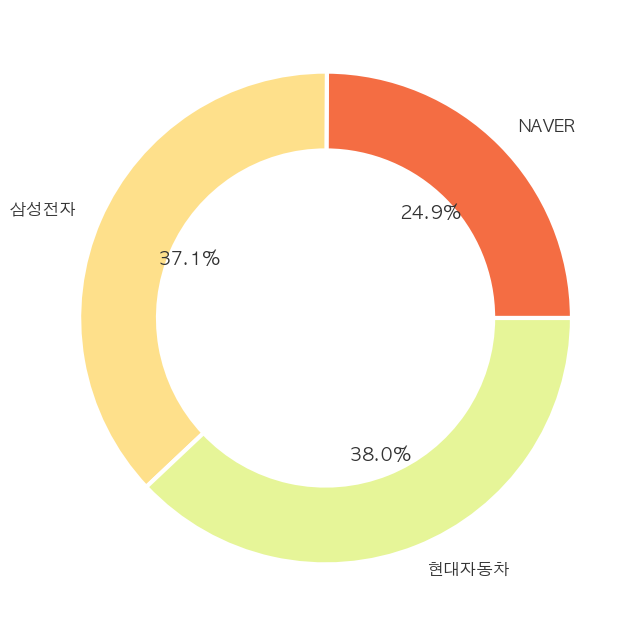

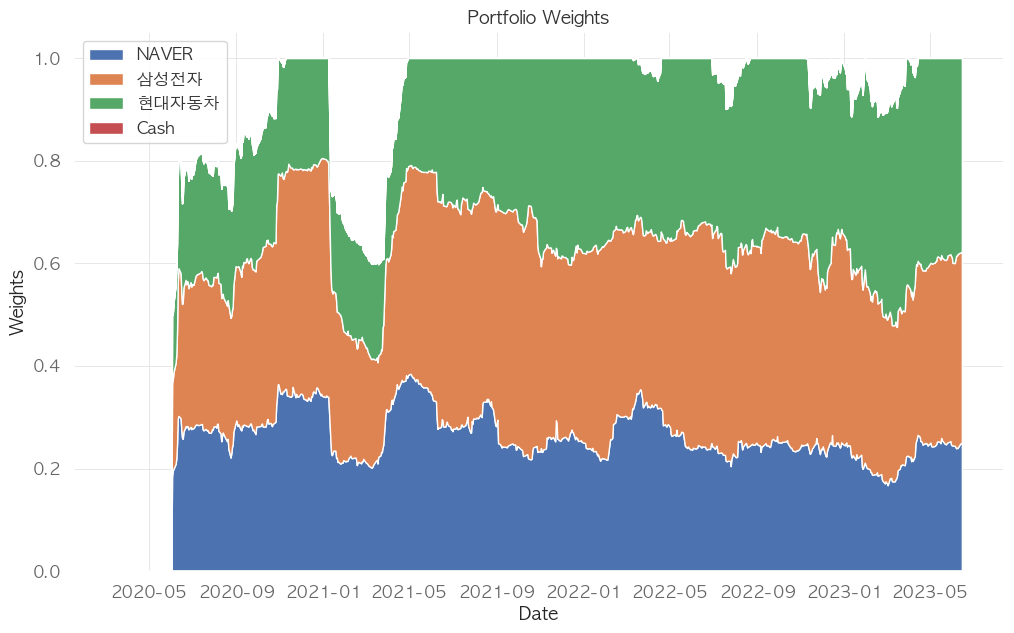

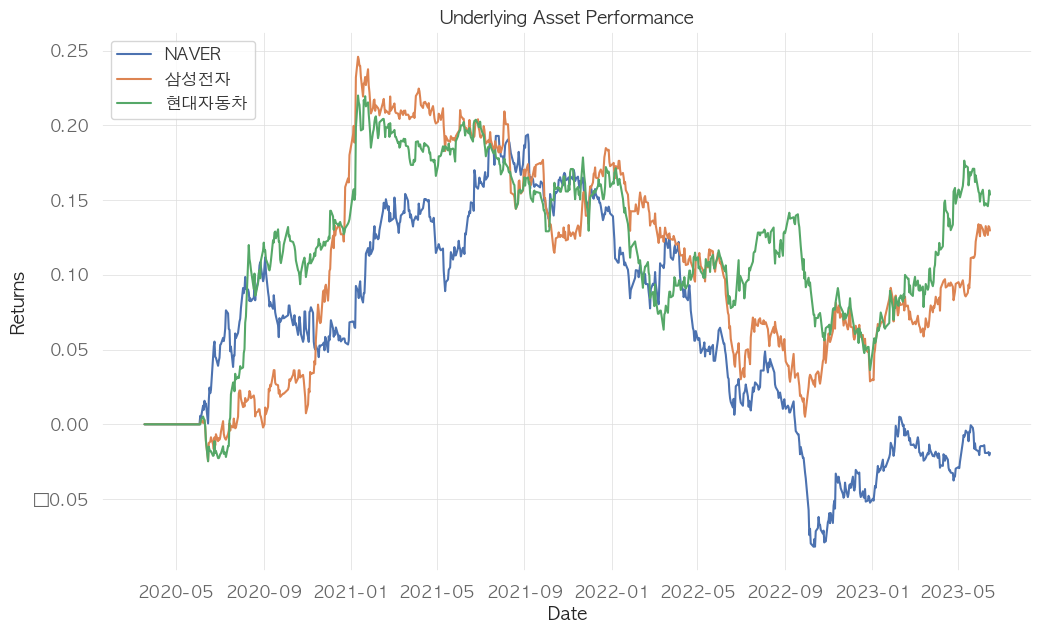

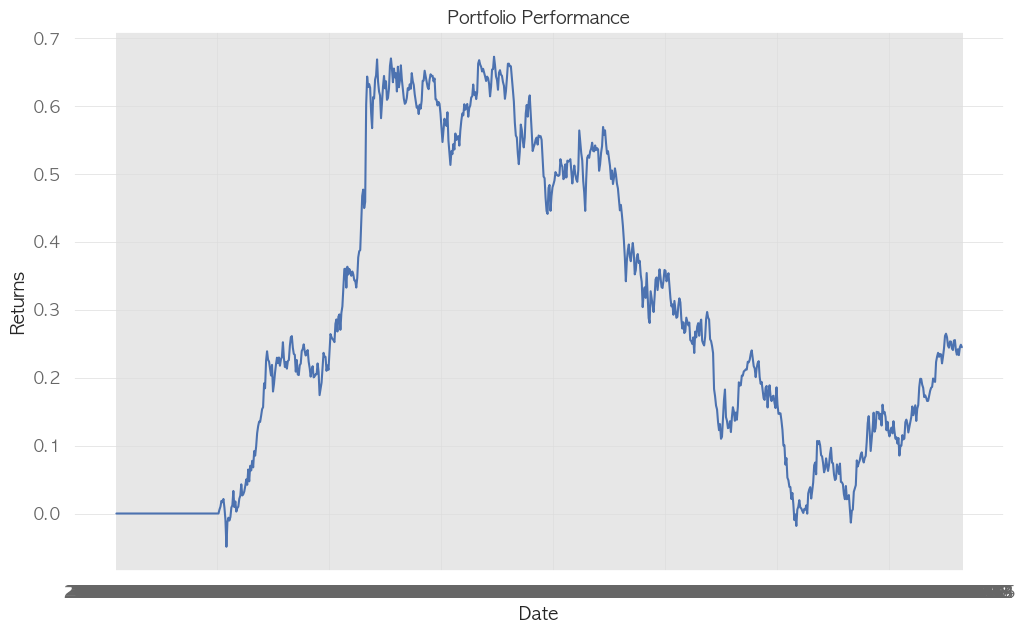

TypeError: PortOptimizer.plot_pie_chart() takes 2 positional arguments but 3 were given

In [98]:
port_weights = res[0]
port_asset_rets = res[1]
port_rets = res[2]
plot_pie_chart(port_weights.iloc[-1], port_weights.columns)
engine.performance_analytics(port_weights, port_asset_rets, port_rets, qs_report=True)